© 2025 WaLSA Team - Shahin Jafarzadeh et al.

This notebook is part of the [WaLSAtools](https://github.com/WaLSAteam/WaLSAtools) package (v1.0.0), provided under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0).

You may use, modify, and distribute this notebook and its contents under the terms of the license.

---

**Important Note on Figures**:
Figures generated using this notebook that are **identical to or derivative of those published in**:  
**Jafarzadeh, S., Jess, D. B., Stangalini, M. et al. 2025, Nature Reviews Methods Primers, in press**,  
are copyrighted by ***Nature Reviews Methods Primers***. Any reuse of such figures requires explicit permission from the journal.

Figures that are newly created, modified, or unrelated to the published article may be used under the terms of the Apache License.

---

**Disclaimer**:
This notebook and its code are provided "as is", without warranty of any kind, express or implied. Refer to the license for more details.

In [1]:
from astropy.io import fits # type: ignore
from WaLSAtools import WaLSAtools, WaLSA_save_pdf # type: ignore

# Load FITS data
data_dir = 'Synthetic_Data/'
hdul = fits.open(data_dir + 'NRMP_signal_3D.fits')
signal_3d = hdul[0].data  # 3D synthetic data
time = hdul[1].data # Time array, saved in the second HDU (Extension HDU 1)
hdul.close()

# Computed POD modes using WaLSAtools
pod_results = WaLSAtools(
    signal=signal_3d, 
    time=time, 
    method='pod', 
    num_modes=10, 
    num_top_frequencies=10, 
    top_frequencies = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55], # in Hz
    num_cumulative_modes=50, 
    timestep_to_reconstruct=1,
    num_modes_reconstruct=22  
)

Starting POD analysis ....
Processing a 3D cube with shape (200, 130, 130).
POD analysis completed.
Top 10 frequencies and normalized power values:
[[0.1, 1.0], [0.15, 0.7], [0.25, 0.61], [0.2, 0.54], [0.3, 0.47], [0.5, 0.39], [0.35, 0.32], [0.4, 0.25], [0.45, 0.24], [0.55, 0.18]]
Total variance contribution of the first 10 modes: 96.01%

---- POD/SPOD Results Summary ----

input_data (ndarray, Shape: (200, 130, 130)): Original input data, mean subtracted (Shape: (Nt, Ny, Nx))
spatial_mode (ndarray, Shape: (200, 130, 130)): Reshaped spatial modes matching the dimensions of the input data (Shape: (Nmodes, Ny, Nx))
temporal_coefficient (ndarray, Shape: (200, 200)): Temporal coefficients associated with each spatial mode (Shape: (Nmodes, Nt))
eigenvalue (ndarray, Shape: (200,)): Eigenvalues corresponding to singular values squared (Shape: (Nmodes))
eigenvalue_contribution (ndarray, Shape: (200,)): Eigenvalue contribution of each mode (Shape: (Nmodes))
cumulative_eigenvalues (list, Shape: 

In [2]:
frequency_filtered_modes = pod_results['frequency_filtered_modes']
frequency_filtered_modes_frequencies = pod_results['frequency_filtered_modes_frequencies']

GPL Ghostscript 10.04.0 (2024-09-18)
Copyright (C) 2024 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1
PDF saved in CMYK format as 'Figures/FigS7_POD_frequency_filtered_spatial_modes.pdf'


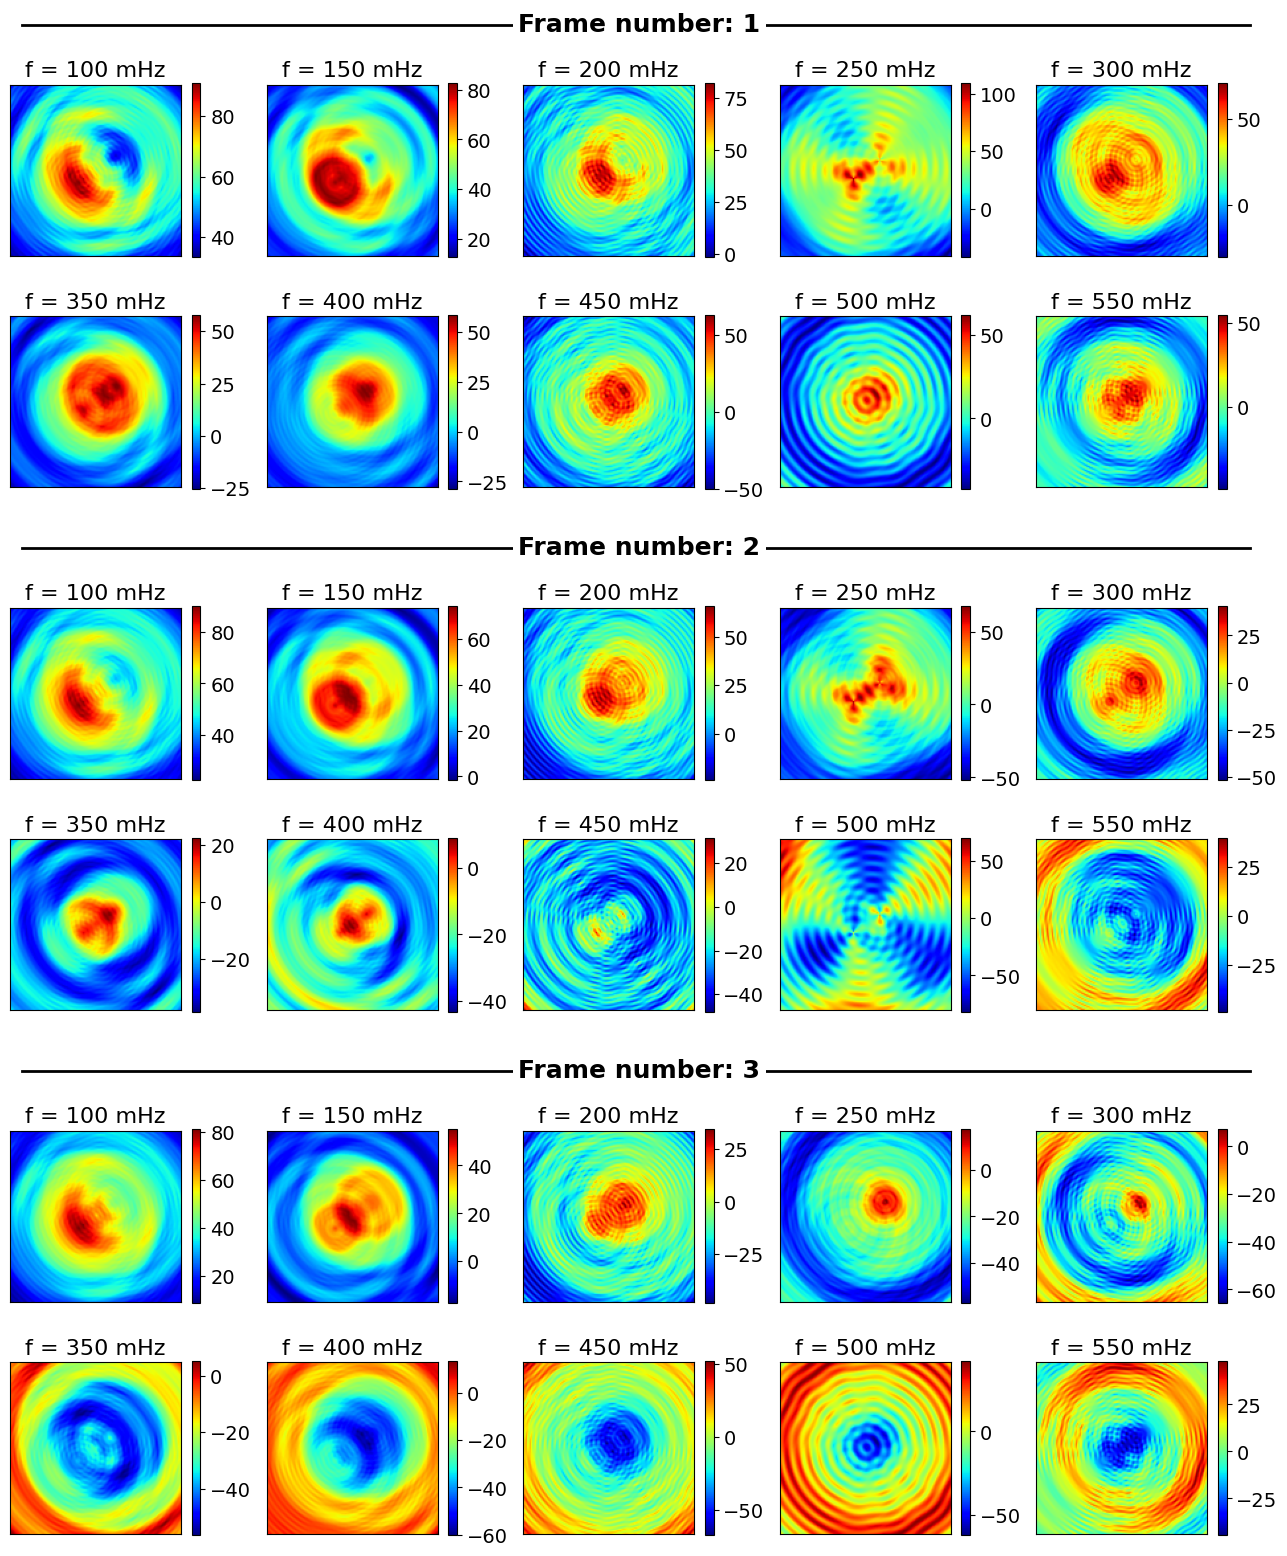

In [3]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.gridspec as gridspec # type: ignore

# Setting global parameters for the plot
plt.rcParams.update({
    'font.size': 14,          # Global font size
    'axes.titlesize': 16,     # Title font size
    'axes.labelsize': 16,     # Axis label font size
    'xtick.labelsize': 12,    # X-axis tick label font size
    'ytick.labelsize': 12,    # Y-axis tick label font size
    'legend.fontsize': 14,    # Legend font size
    'figure.titlesize': 17,   # Figure title font size
    'axes.grid': False,       # Turn off grid by default
    'grid.alpha': 0.5,        # Grid transparency
    'grid.linestyle': '--',   # Grid line style
})

figure = plt.figure(figsize=(16., 20.))  # Set figure size
gs1 = gridspec.GridSpec(9, 5, figure=figure, height_ratios=[0.15, 1, 1, 0.15, 1, 1, 0.15, 1, 1])

# Add a horizontal line and title (frame number)
line_ax1 = plt.subplot(gs1[0, :])
line_ax1.plot([0.01, 1], [0, 0], clip_on=False, color='black', linewidth=2)
plt.text(0.41, 0, 'Frame number: 1', fontsize=18, fontweight='bold', verticalalignment='center', bbox=dict(facecolor='white', edgecolor='none'))
line_ax1.axis('off')
line_ax1.set_xticks([])  # Remove x ticks
line_ax1.set_yticks([])  # Remove y ticks
line_ax1.set_xlim(0, 1)

frame_index = 0
for i in range(0, 5):
    ax_img = plt.subplot(gs1[1, i])
    img = plt.imshow(frequency_filtered_modes[frame_index, :, :, i], cmap='jet', aspect='equal', origin='lower')
    ax_img.set_title(f'f = {(int(np.round(frequency_filtered_modes_frequencies[i]*1000)))} mHz')
    ax_img.set_xticks([])  # Remove x ticks
    ax_img.set_yticks([])  # Remove y ticks
    cbar = plt.colorbar(img, orientation='vertical', shrink=0.86)
    cbar.ax.tick_params(labelsize=14)

for j in range(5, 10):
    ax_img = plt.subplot(gs1[2, j-5])
    img = plt.imshow(frequency_filtered_modes[frame_index, :, :, j], cmap='jet', aspect='equal', origin='lower')
    ax_img.set_title(f'f = {(int(np.round(frequency_filtered_modes_frequencies[j]*1000)))} mHz')
    ax_img.set_xticks([])  # Remove x ticks
    ax_img.set_yticks([])  # Remove y ticks
    cbar = plt.colorbar(img, orientation='vertical', shrink=0.86)
    cbar.ax.tick_params(labelsize=14)

# Add a horizontal line and title (frame number)
line_ax1 = plt.subplot(gs1[3, :])
line_ax1.plot([0.01, 1], [0, 0], clip_on=False, color='black', linewidth=2)
plt.text(0.41, 0, 'Frame number: 2', fontsize=18, fontweight='bold', verticalalignment='center', bbox=dict(facecolor='white', edgecolor='none'))
line_ax1.axis('off')
line_ax1.set_xticks([])  # Remove x ticks
line_ax1.set_yticks([])  # Remove y ticks
line_ax1.set_xlim(0, 1)

frame_index = 1
for i in range(0, 5):
    ax_img = plt.subplot(gs1[4, i])
    img = plt.imshow(frequency_filtered_modes[frame_index, :, :, i], cmap='jet', aspect='equal', origin='lower')
    ax_img.set_title(f'f = {(int(np.round(frequency_filtered_modes_frequencies[i]*1000)))} mHz')
    ax_img.set_xticks([])  # Remove x ticks
    ax_img.set_yticks([])  # Remove y ticks
    cbar = plt.colorbar(img, orientation='vertical', shrink=0.86)
    cbar.ax.tick_params(labelsize=14)

for j in range(5, 10):
    ax_img = plt.subplot(gs1[5, j-5])
    img = plt.imshow(frequency_filtered_modes[frame_index, :, :, j], cmap='jet', aspect='equal', origin='lower')
    ax_img.set_title(f'f = {(int(np.round(frequency_filtered_modes_frequencies[j]*1000)))} mHz')
    ax_img.set_xticks([])  # Remove x ticks
    ax_img.set_yticks([])  # Remove y ticks
    cbar = plt.colorbar(img, orientation='vertical', shrink=0.86)
    cbar.ax.tick_params(labelsize=14)

# Add a horizontal line and title (frame number)
line_ax1 = plt.subplot(gs1[6, :])
line_ax1.plot([0.01, 1], [0, 0], clip_on=False, color='black', linewidth=2)
plt.text(0.41, 0, 'Frame number: 3', fontsize=18, fontweight='bold', verticalalignment='center', bbox=dict(facecolor='white', edgecolor='none'))
line_ax1.axis('off')
line_ax1.set_xticks([])  # Remove x ticks
line_ax1.set_yticks([])  # Remove y ticks
line_ax1.set_xlim(0, 1)

frame_index = 2
for i in range(0, 5):
    ax_img = plt.subplot(gs1[7, i])
    img = plt.imshow(frequency_filtered_modes[frame_index, :, :, i], cmap='jet', aspect='equal', origin='lower')
    ax_img.set_title(f'f = {(int(np.round(frequency_filtered_modes_frequencies[i]*1000)))} mHz')
    ax_img.set_xticks([])  # Remove x ticks
    ax_img.set_yticks([])  # Remove y ticks
    cbar = plt.colorbar(img, orientation='vertical', shrink=0.86)
    cbar.ax.tick_params(labelsize=14)

for j in range(5, 10):
    ax_img = plt.subplot(gs1[8, j-5])
    img = plt.imshow(frequency_filtered_modes[frame_index, :, :, j], cmap='jet', aspect='equal', origin='lower')
    ax_img.set_title(f'f = {(int(np.round(frequency_filtered_modes_frequencies[j]*1000)))} mHz')
    ax_img.set_xticks([])  # Remove x ticks
    ax_img.set_yticks([])  # Remove y ticks
    cbar = plt.colorbar(img, orientation='vertical', shrink=0.86)
    cbar.ax.tick_params(labelsize=14)

# Save the figure as a PDF
pdf_path = 'Figures/FigS7_POD_frequency_filtered_spatial_modes.pdf'
WaLSA_save_pdf(figure, pdf_path, color_mode='CMYK', dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()


In [4]:
# Save the first six frames of the frequency-filtered POD reconstruction at 0.5 Hz (500 mHz), as a FITS file.
# To be used in Figure 5 of the Nature Reviews Methods Primers paper

num_images = 6
freq_index = np.where(np.isclose(frequency_filtered_modes_frequencies, 0.5))[0]
data_cube = np.zeros((num_images, signal_3d.shape[1], signal_3d.shape[2]))
for i in range(num_images):
    data_cube[i, :, :] = frequency_filtered_modes[i, :, :, freq_index]
hdu_var = fits.PrimaryHDU(data_cube)
hdu_var.writeto('Saved_Parameters/POD_first_6_frequency_filtered_spatial_modes_at_500mHz.fits', overwrite=True)

In [5]:
# Create a set of images for the frequency-filtered POD reconstruction at all time steps
# To be used in the Supplementary Video 2

# Setting global parameters
plt.rcParams.update({
    'font.size': 14,          # Global font size
    'axes.titlesize': 16,     # Title font size
    'axes.labelsize': 16,     # Axis label font size
    'xtick.labelsize': 12,    # X-axis tick label font size
    'ytick.labelsize': 12,    # Y-axis tick label font size
    'legend.fontsize': 14,    # Legend font size
    'figure.titlesize': 17,   # Figure title font size
    'axes.grid': False,        # Turn on grid by default
    'grid.alpha': 0.5,        # Grid transparency
    'grid.linestyle': '--',   # Grid line style
})

for frame_index in range(0, 200):
    figure = plt.figure(figsize=(16., 6.6))
    gs1 = gridspec.GridSpec(5, 5, figure=figure, height_ratios=[0.1, 0.1, 1, 0.1, 1])

    # Add a horizontal line and title (frame number)
    line_ax1 = plt.subplot(gs1[0, :])
    line_ax1.plot([0.01, 1], [0, 0], clip_on=False, color='black', linewidth=2)
    plt.text(0.405, 0, f'Frame number: {frame_index+1}', fontsize=18, fontweight='bold', verticalalignment='center', bbox=dict(facecolor='white', edgecolor='none'))
    line_ax1.axis('off')
    line_ax1.set_xticks([])  # Remove x ticks
    line_ax1.set_yticks([])  # Remove y ticks
    line_ax1.set_xlim(0,1)

    for i in range(0, 5):
        ax_img = plt.subplot(gs1[2, i])
        img = plt.imshow(frequency_filtered_modes[frame_index, :, :, i], cmap='jet', aspect='equal', origin='lower')
        ax_img.set_title(f'f = {(int(np.round(frequency_filtered_modes_frequencies[i]*1000)))} mHz')
        ax_img.set_xticks([])  # Remove x ticks
        ax_img.set_yticks([])  # Remove y ticks
        cbar.ax.tick_params(labelsize=14)

    for j in range(5, 10):
        ax_img = plt.subplot(gs1[4, j-5])
        img = plt.imshow(frequency_filtered_modes[frame_index, :, :, j], cmap='jet', aspect='equal', origin='lower')
        ax_img.set_title(f'f = {(int(np.round(frequency_filtered_modes_frequencies[j]*1000)))} mHz')
        ax_img.set_xticks([])  # Remove x ticks
        ax_img.set_yticks([])  # Remove y ticks
        cbar.ax.tick_params(labelsize=14)

    plt.savefig(f'Video_Snapshots/Supplementary_Video_S2/im_{frame_index:03d}.jpg', dpi=300, bbox_inches='tight', pad_inches=0.2)  
    plt.close()
    
print("Images saved successfully.")

Images saved successfully.
